In [1]:
import pandas
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
label_size = 20

# Plots for Experiment 1 (Increasing number of hidden nodes)

In [3]:
fileCounter = 0
initilized = False
df = None
#for root, dirs, files in os.walk(r'Data\2019_10_19_test7\model_1_11'):
for x in range(1,6):
    for root, dirs, files in os.walk(r'.\Data\Epxeriment_1_2019_10_23_MultiplePairs'):
        if(('model_'+str(x)) in root):
            for file in sorted(files):
                path = root + '\\' + file
                if str(path).endswith('.csv'):
                    if(not initilized):
                        df = pandas.read_csv(path)
                        df['Experiment'] = fileCounter
                        df['source'] = x
                        initilized = True
                    else:
                        tempDf = pandas.read_csv(path)
                        tempDf['Experiment'] = fileCounter
                        tempDf['source'] = x
                        df = df.append(tempDf)
                    fileCounter += 1

In [4]:
groupedDf = df.groupby(['source', 'batch_sizes', 'epochs', 'layers', 'losses', 'nodes', 'optimizers'])
groupedDf.describe()

round_epochs  \
                                                                            count   
source batch_sizes epochs layers losses             nodes optimizers                
1      100         100    1      mean_squared_error 1     adam               40.0   
                                                    2     adam               40.0   
                                                    3     adam               40.0   
                                                    8     adam               40.0   
                                                    16    adam               40.0   
                                                    32    adam               40.0   
                                                    64    adam               40.0   
                                                    128   adam               40.0   
2      100         100    1      mean_squared_error 1     adam               40.0   
                                                    2     adam               40.0   
                                                    3     adam               40.0   
                                                    8     adam               40.0   
                                                    16    adam               40.0   
                                                    32    adam               40.0   
                                                    64    adam               40.0   
                                                    128   adam               40.0   
3      100         100    1      mean_squared_error 1     adam               40.0   
                                                    2     adam               40.0   
                                                    3     adam               40.0   
                                                    8     adam               40.0   
                                                    16    adam               40.0   
                                                    32    adam               40.0   
                                                    64    adam               40.0   
                                                    128   adam               40.0   
4      100         100    1      mean_squared_error 1     adam               40.0   
                                                    2     adam               40.0   
                                                    3     adam               40.0   
                                                    8     adam               40.0   
                                                    16    adam               40.0   
                                                    32    adam               40.0   
                                                    64    adam               40.0   
                                                    128   adam               40.0   
5      100         100    1      mean_squared_error 1     adam               40.0   
                                                    2     adam               40.0   
                                                    3     adam               40.0   
                                                    8     adam               40.0   
                                                    16    adam               40.0   
                                                    32    adam               40.0   
                                                    64    adam               40.0   
                                                    128   adam               40.0   

                                                                             \
                                                                       mean   
source batch_sizes epochs layers losses             nodes optimizers          
1      100         100    1      mean_squared_error 1     adam        100.0   
                                                    2     adam        100.0   
                  

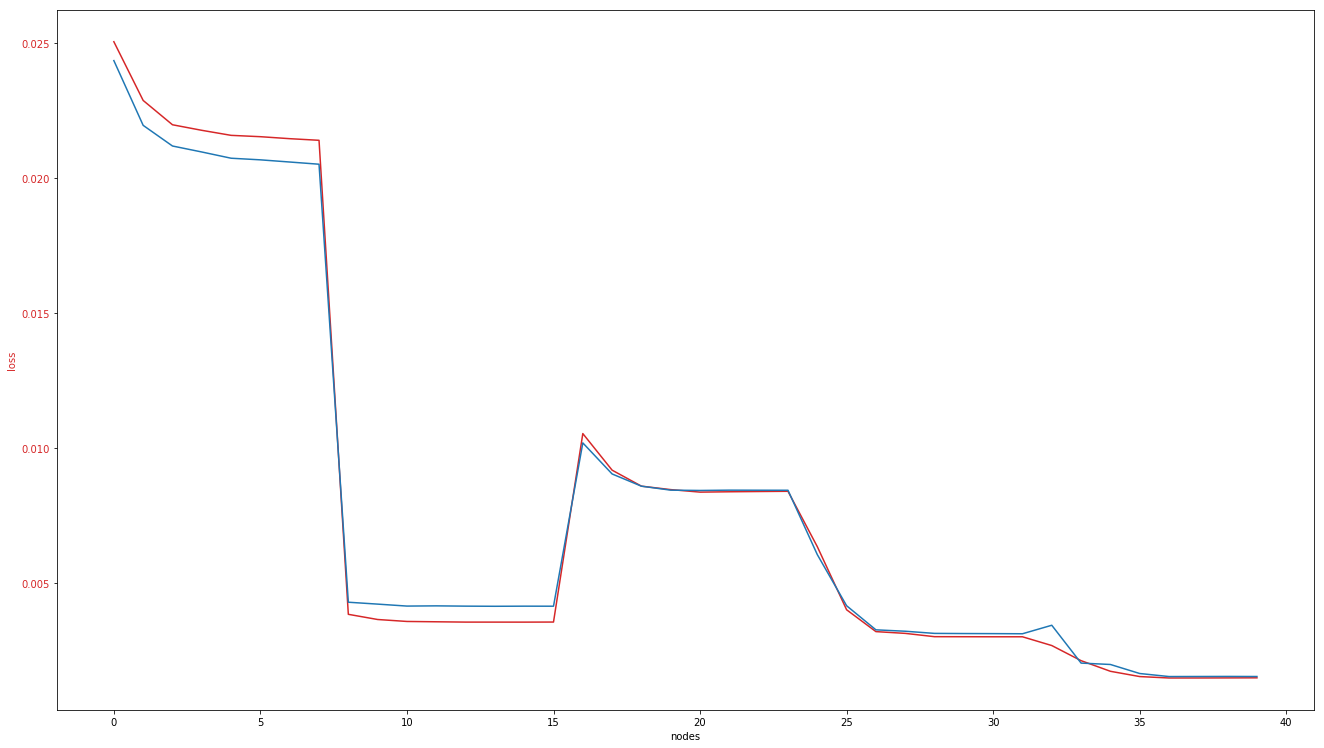

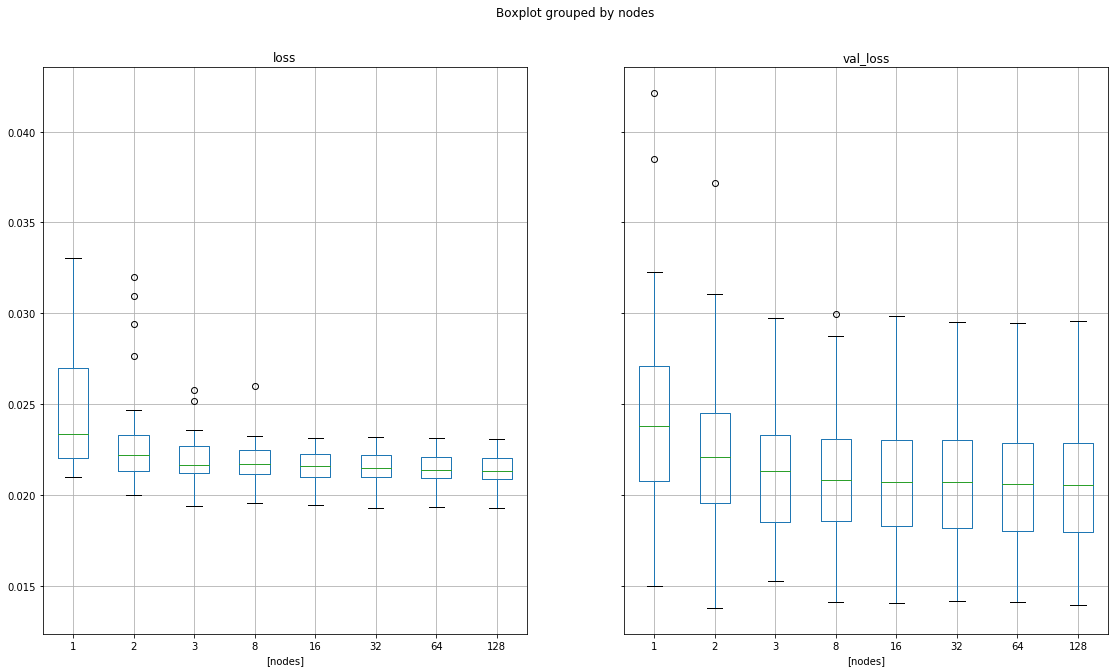

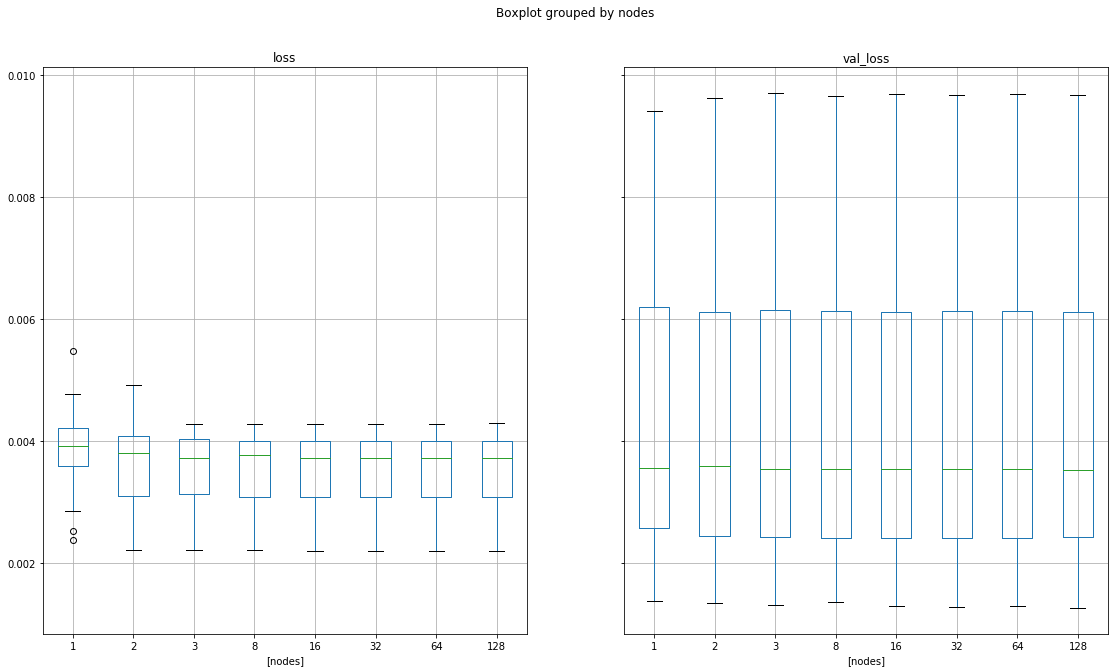

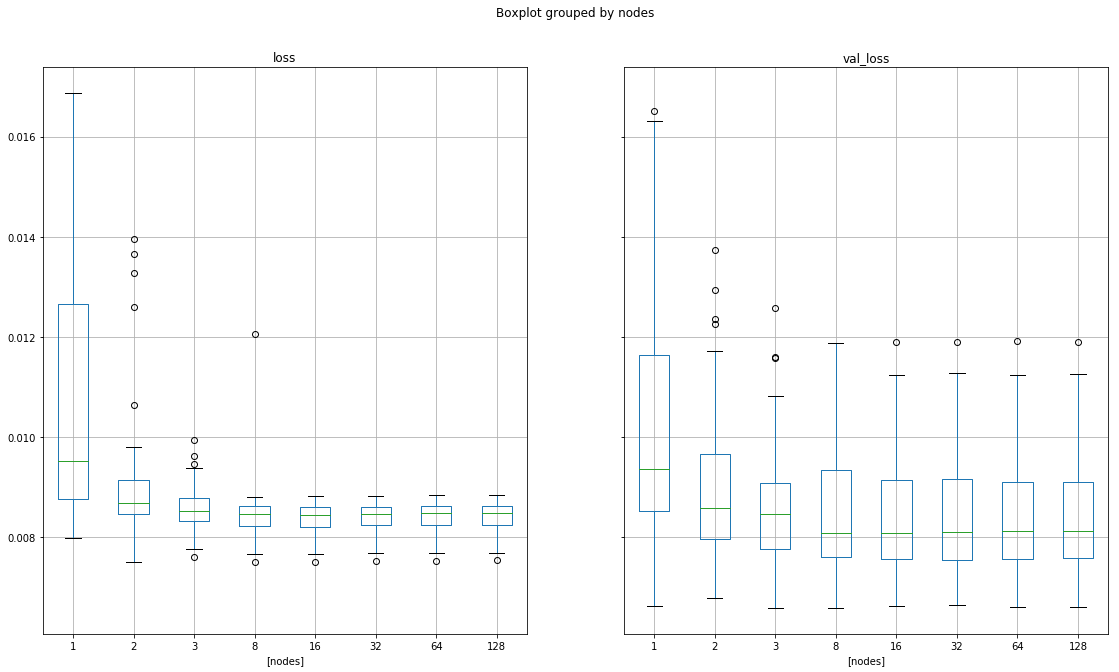

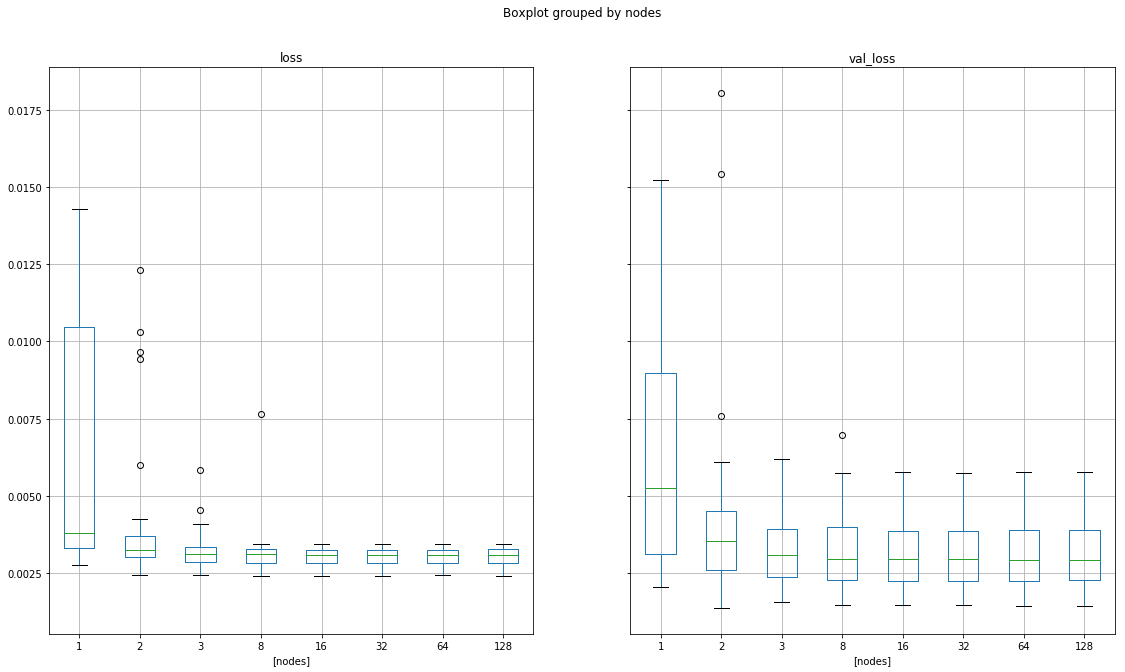

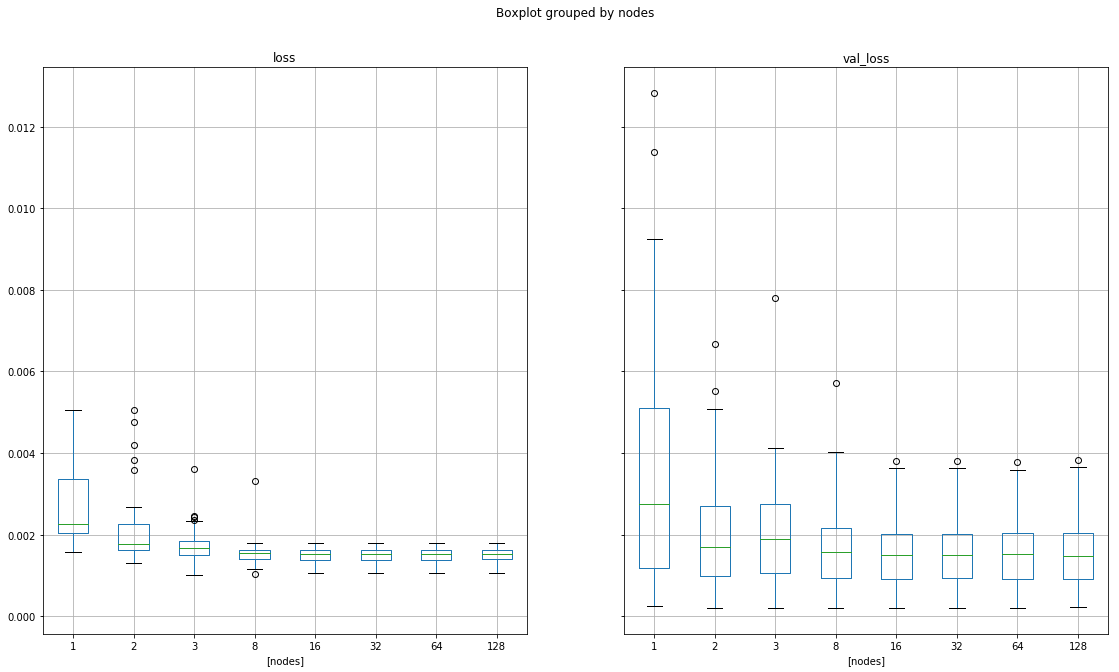

In [5]:
#plot loss
fig, ax1 = plt.subplots()

fig.set_size_inches(18.5, 10.5)

color = 'tab:red'
ax1.set_xlabel('nodes')
ax1.set_ylabel('loss', color=color)
ax1.plot(groupedDf['loss'].mean().values, color=color)
ax1.plot(groupedDf['val_loss'].mean().values)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#plot loss vs batch_size
for source in range(1,6):
    df[(df['source']==source)].boxplot(column=['loss', 'val_loss'], by=['nodes'], figsize=(18.5, 10.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
#print(mean_of_losses.iloc[mean_of_losses['loss'].idxmin()])
#print('----------------------------------')
#print(mean_of_losses.iloc[mean_of_losses['val_loss'].idxmin()])

# Plots for Experiment 2 (Increasing look_back))

In [7]:
fileCounter = 0
initilized = False
df = None
#for root, dirs, files in os.walk(r'Data\2019_10_19_test7\model_1_11'):
for x in range(1,6):
    for root, dirs, files in os.walk(r'.\Data\Epxeriment_2_2019_10_24_MultiplePairs'):
        if(('model_'+str(x)) in root):
            fileCounter = 0
            look_back = 0
            if(root.endswith('1')):
                look_back = 1
            if(root.endswith('2')):
                look_back = 2
            if(root.endswith('4')):
                look_back = 4
            if(root.endswith('8')):
                look_back = 8
            if(root.endswith('16')):
                look_back = 16
            for file in sorted(files):
                path = root + '\\' + file
                if str(path).endswith('.csv'):
                    if(not initilized):
                        df = pandas.read_csv(path)
                        df['Experiment'] = fileCounter
                        df['look_back'] = look_back
                        df['source'] = x
                        initilized = True
                    else:
                        tempDf = pandas.read_csv(path)
                        tempDf['Experiment'] = fileCounter
                        tempDf['look_back'] = look_back
                        tempDf['source'] = x
                        df = df.append(tempDf)
                    fileCounter += 1

In [8]:
groupedDf_look_back = df.groupby(['source', 'batch_sizes', 'epochs', 'layers', 'losses', 'nodes', 'optimizers', 'look_back'])
groupedDf_look_back.describe()

round_epochs  \
                                                                                      count   
source batch_sizes epochs layers losses             nodes optimizers look_back                
1      100         100    1      mean_squared_error 128   adam       1                 40.0   
                                                                     2                 40.0   
                                                                     4                 40.0   
                                                                     8                 40.0   
                                                                     16                40.0   
2      100         100    1      mean_squared_error 128   adam       1                 40.0   
                                                                     2                 40.0   
                                                                     4                 40.0   
                                                                     8                 40.0   
                                                                     16                40.0   
3      100         100    1      mean_squared_error 128   adam       1                 40.0   
                                                                     2                 40.0   
                                                                     4                 40.0   
                                                                     8                 40.0   
                                                                     16                40.0   
4      100         100    1      mean_squared_error 128   adam       1                 40.0   
                                                                     2                 40.0   
                                                                     4                 40.0   
                                                                     8                 40.0   
                                                                     16                40.0   
5      100         100    1      mean_squared_error 128   adam       1                 40.0   
                                                                     2                 40.0   
                                                                     4                 40.0   
                                                                     8                 40.0   
                                                                     16                40.0   

                                                                                       \
                                                                                 mean   
source batch_sizes epochs layers losses             nodes optimizers look_back          
1      100         100    1      mean_squared_error 128   adam       1          100.0   
                                                                     2          100.0   
                                                                     4          100.0   
                                                                     8          100.0   
                                                                     16         100.0   
2      100         100    1      mean_squared_error 128   adam       1          100.0   
                                                                     2          100.0   
                                                                     4          100.0   
                                                                     8          100.0   
                                                                     16         100.0   
3      100         100    1      mean_squared_error 128   adam       1          100.0   
                                                                     2          100.0   
                                                                     4          100

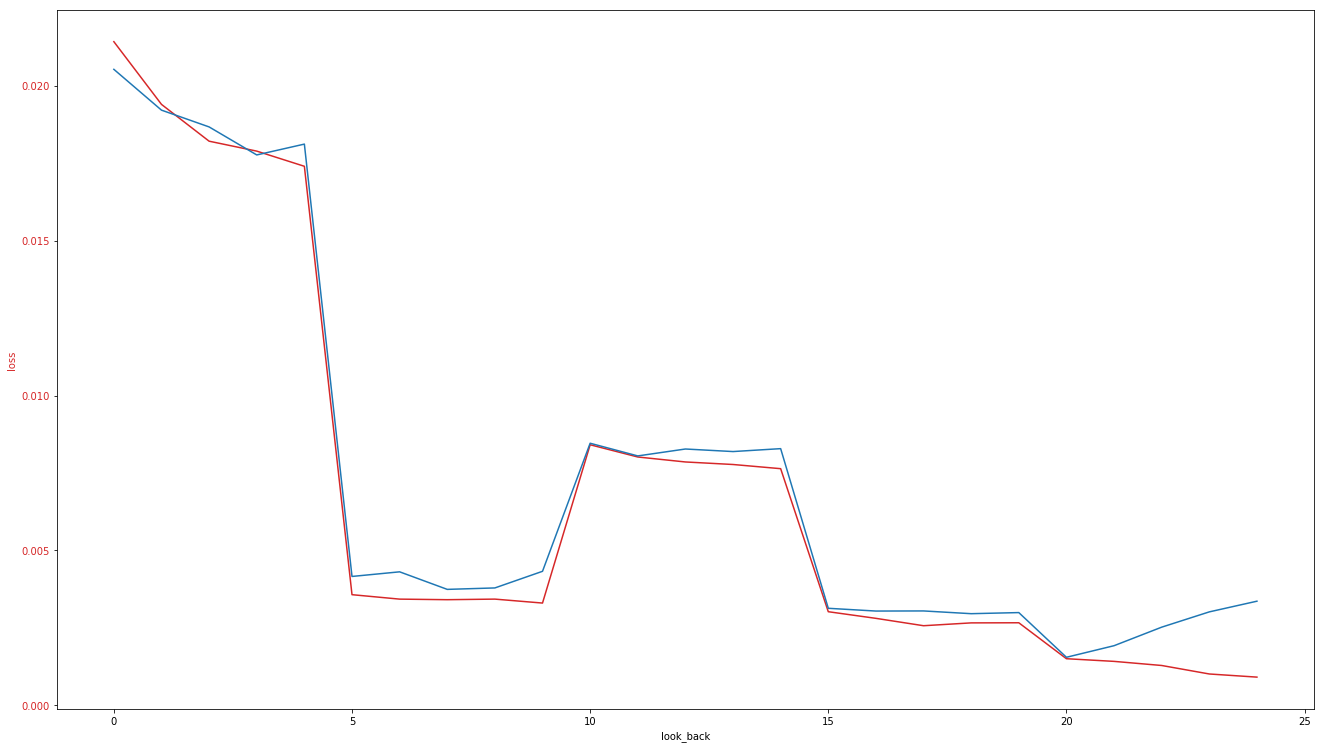

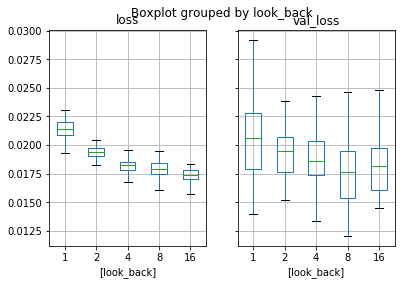

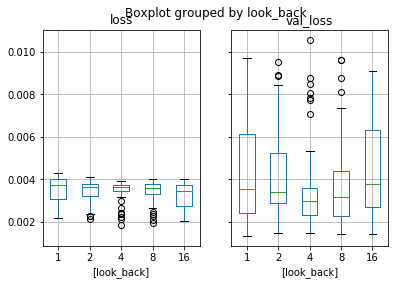

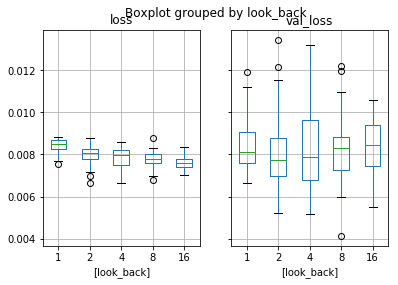

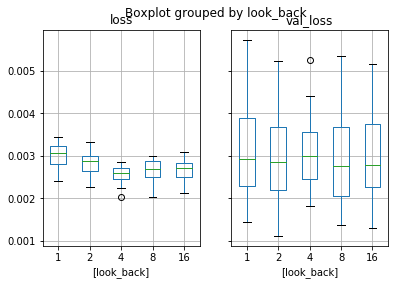

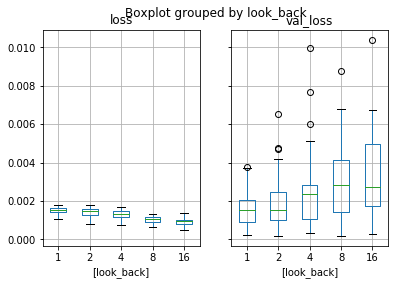

In [9]:
#plot loss
fig, ax1 = plt.subplots()

fig.set_size_inches(18.5, 10.5)

color = 'tab:red'
ax1.set_xlabel('look_back')
ax1.set_ylabel('loss', color=color)
ax1.plot(groupedDf_look_back['loss'].mean().values, color=color)
ax1.plot(groupedDf_look_back['val_loss'].mean().values)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#plot loss vs batch_size
groupedDf_look_back['loss'].agg(numpy.mean)

#plot loss vs batch_size
for source in range(1,6):
    df[df['source']==source].boxplot(column=['loss', 'val_loss'], by=['look_back'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Plots for Experiment 3 (Increasing layers))

In [10]:
fileCounter = 0
initilized = False
df_ex3 = None
#for root, dirs, files in os.walk(r'Data\2019_10_19_test7\model_1_11'):
for x in range(1,6):
    for root, dirs, files in os.walk(r'.\Data\Epxeriment_3_2019_10_26_MultiplePairs'):
        if(('model_'+str(x)) in root):
            for file in sorted(files):
                path = root + '\\' + file
                if str(path).endswith('.csv'):
                    if(not initilized):
                        df_ex3 = pandas.read_csv(path)
                        df_ex3['Experiment'] = fileCounter
                        df_ex3['source'] = x
                        initilized = True
                    else:
                        tempDf = pandas.read_csv(path)
                        tempDf['Experiment'] = fileCounter
                        tempDf['source'] = x
                        df_ex3 = df_ex3.append(tempDf)
                    fileCounter += 1

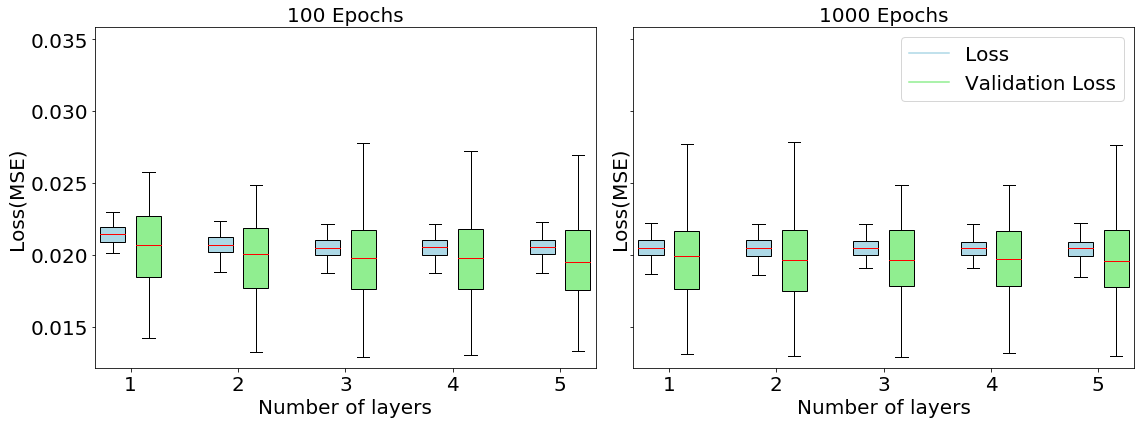

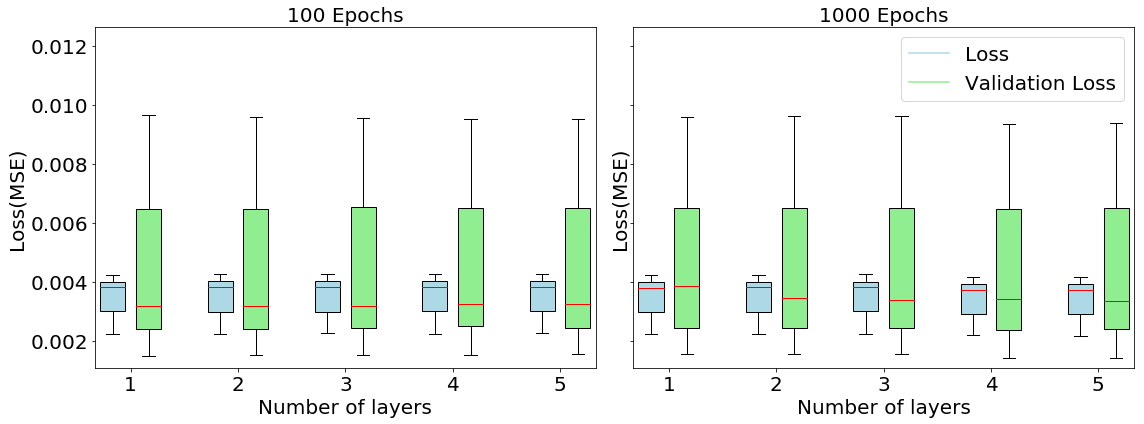

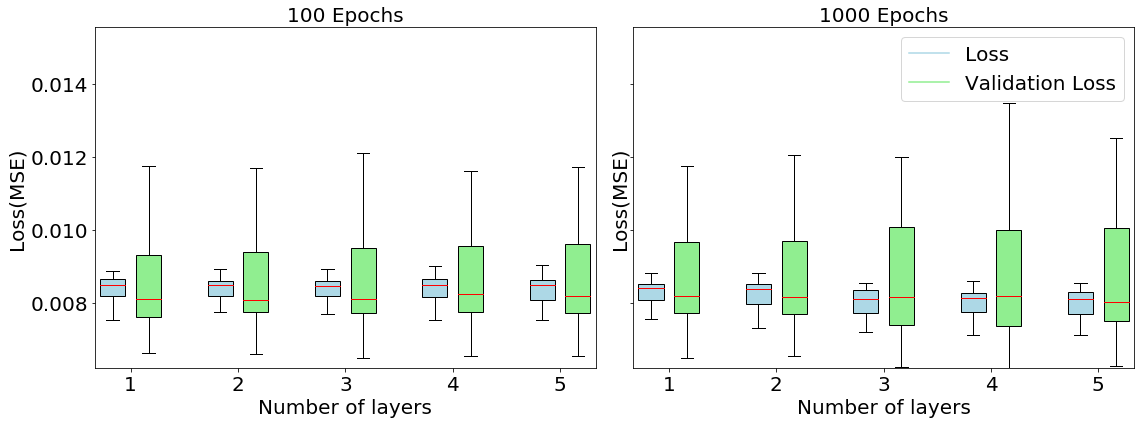

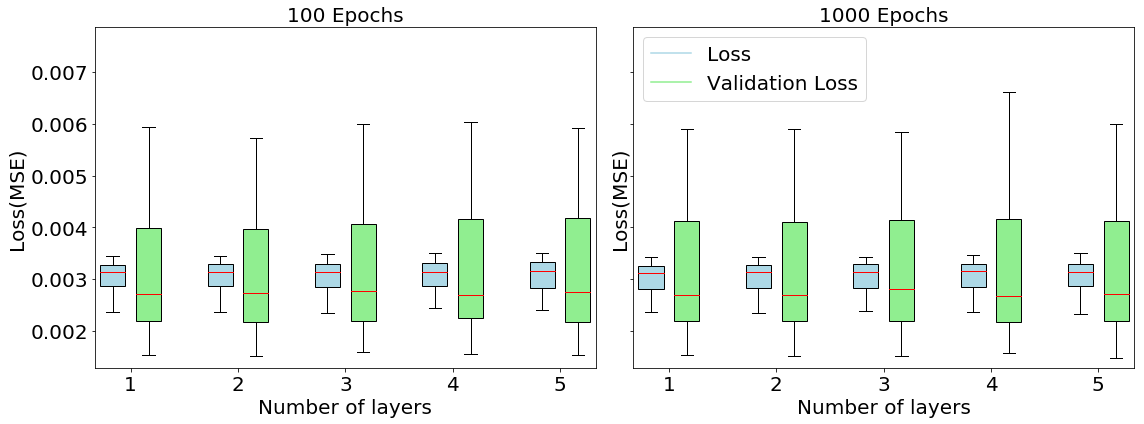

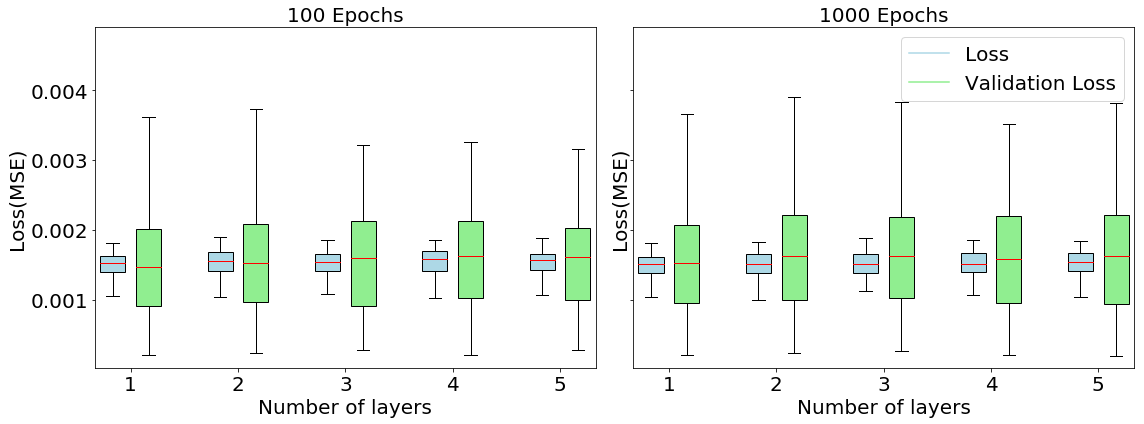

In [11]:
#plot loss vs batch_size
epochs = [100, 1000]
x = 0
for source in range(1,6):
    fig, axs = plt.subplots(1,2, sharey = True)
    fig.set_size_inches(16, 6)
    #fig.suptitle('Loss and Validation Loss for pair (' + str(source) + ',11) when increasing layers', fontsize=12, y=1.05)
    for epoch in epochs:
        d1 = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==1)].loss
        d1_v = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==1)].val_loss

        d2 = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==2)].loss
        d2_v = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==2)].val_loss

        d3 = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==3)].loss
        d3_v = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==3)].val_loss

        d4 = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==4)].loss
        d4_v = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==4)].val_loss

        d5 = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==5)].loss
        d5_v = df_ex3[(df_ex3['source']==source)&(df_ex3['epochs']==epoch)&(df_ex3['layers']==5)].val_loss

        axs[x].set_xlabel('Number of layers',fontsize=label_size)
        axs[x].set_ylabel('Loss(MSE)',fontsize=label_size)
                
        bp = axs[x].boxplot([d1,d1_v,d2,d2_v,d3,d3_v,d4,d4_v,d5,d5_v], positions=[1,2,4,5,7,8,10,11,13,14], widths = 0.7, showfliers=False, patch_artist=True)
        odd = True
        for patch in bp['boxes']:
            if(odd):
                patch.set_facecolor('lightblue')
                odd = False
            else:
                patch.set_facecolor('lightgreen')
                odd = True
        for line in bp['medians']:
            line.set_color('red')
                
        axs[x].set_xticklabels([1, 2, 3, 4, 5])
        axs[x].set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
        axs[x].set_title(str(epoch) + ' Epochs', fontsize=label_size)
        
        lim = axs[x].get_ylim()
        lim = (lim[0],lim[1]+(lim[1]*0.12))
        axs[x].set_ylim(lim)
        axs[x].plot([], c='lightblue', label='Loss')
        axs[x].plot([], c='lightgreen', label='Validation Loss')
        plt.legend(fontsize=label_size)
        
        #i_x = numpy.random.normal(1, 0.04, size=len(d1))
        #axs[x].plot(i_x, d1, 'r.', alpha=0.2)
        axs[x].tick_params(labelsize=label_size)
        if(x==0):
            x = 1
        else:
            x = 0
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_3_{0}.svg'.format(source))
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_3_{0}.pdf'.format(source))
plt.show()

# Plots for Experiment 4 (Increasing epochs/batch_sizes))

In [12]:
fileCounter = 0
initilized = False
df_ex4 = None
#for root, dirs, files in os.walk(r'Data\2019_10_19_test7\model_1_11'):
for x in range(1,6):
    for root, dirs, files in os.walk(r'.\Data\Epxeriment_4_2019_10_25_MultiplePairs'):
        if(('model_'+str(x)) in root):
            for file in sorted(files):
                path = root + '\\' + file
                if str(path).endswith('.csv'):
                    if(not initilized):
                        df_ex4 = pandas.read_csv(path)
                        df_ex4['Experiment'] = fileCounter
                        df_ex4['source'] = x
                        initilized = True
                    else:
                        tempDf = pandas.read_csv(path)
                        tempDf['Experiment'] = fileCounter
                        tempDf['source'] = x
                        df_ex4 = df_ex4.append(tempDf)
                    fileCounter += 1

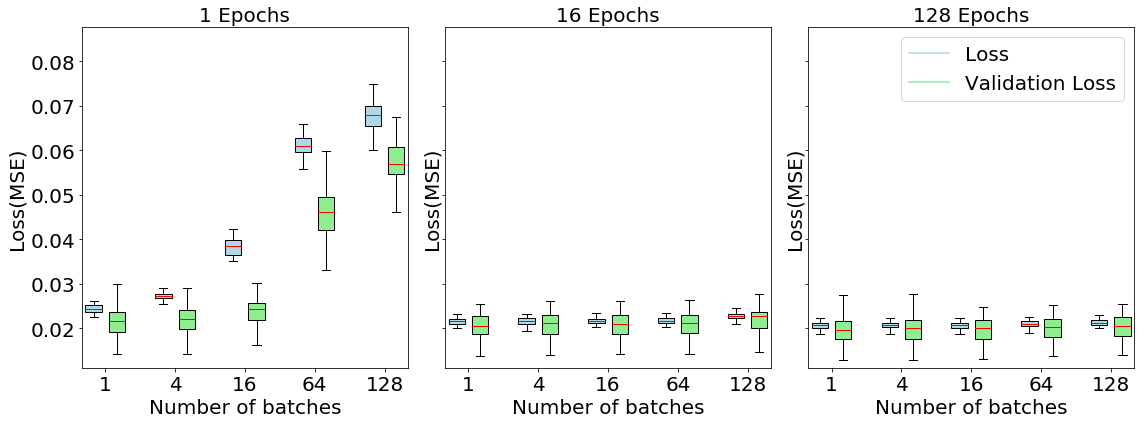

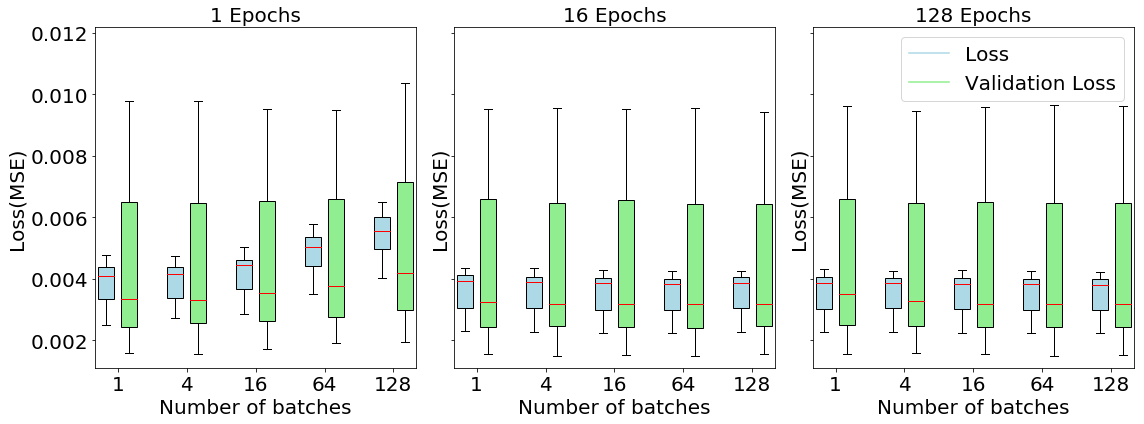

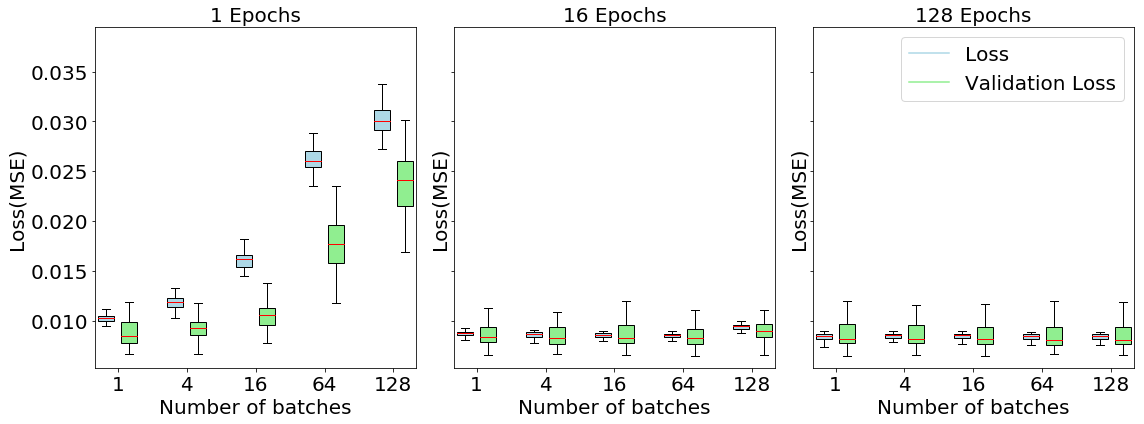

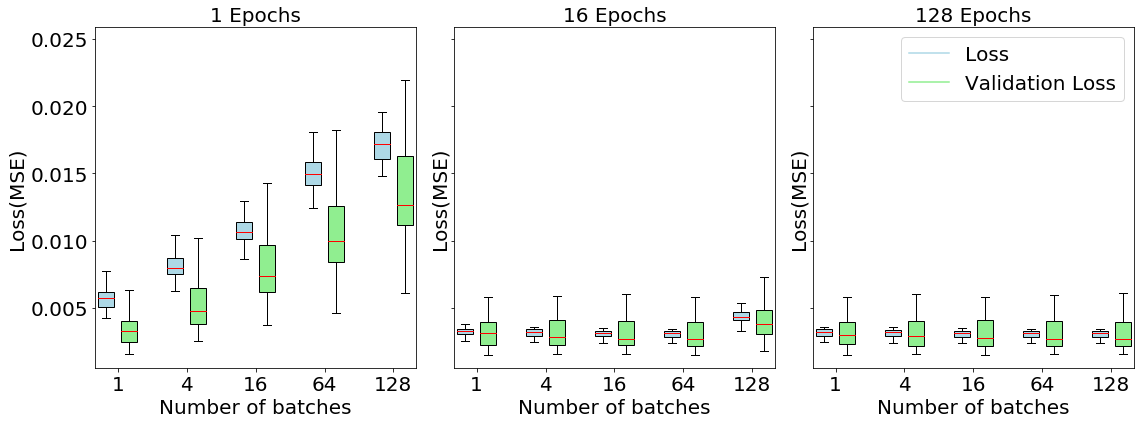

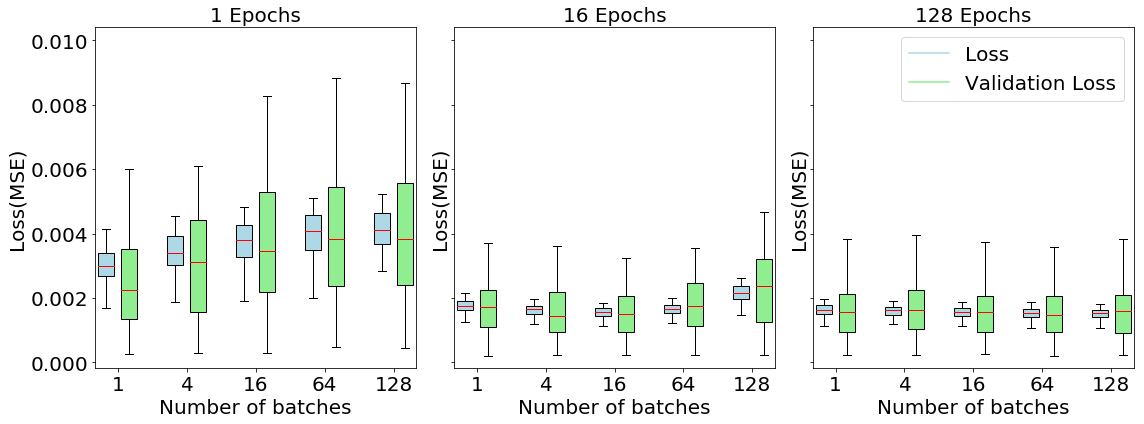

In [13]:
#plot loss vs batch_size
epochs = [1, 16 ,128]
x = 0
for source in range(1,6):
    fig, axs = plt.subplots(1,3, sharey = True)
    fig.set_size_inches(16, 6)
    #fig.suptitle('Loss and Validation Loss for pair (' + str(source) + ',11) when increasing number of batches', fontsize=12, y=1.05)
    for epoch in epochs:
        d1 = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==1)].loss
        d1_v = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==1)].val_loss

        d2 = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==4)].loss
        d2_v = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==4)].val_loss

        d3 = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==16)].loss
        d3_v = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==16)].val_loss

        d4 = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==64)].loss
        d4_v = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==64)].val_loss

        d5 = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==128)].loss
        d5_v = df_ex4[(df_ex4['source']==source)&(df_ex4['epochs']==epoch)&(df_ex4['batch_sizes']==128)].val_loss

        axs[x].set_xlabel('Number of batches',fontsize=label_size)
        axs[x].set_ylabel('Loss(MSE)',fontsize=label_size)
                
        bp = axs[x].boxplot([d1,d1_v,d2,d2_v,d3,d3_v,d4,d4_v,d5,d5_v], positions=[1,2,4,5,7,8,10,11,13,14], widths = 0.7, showfliers=False, patch_artist=True)
        odd = True
        for patch in bp['boxes']:
            if(odd):
                patch.set_facecolor('lightblue')
                odd = False
            else:
                patch.set_facecolor('lightgreen')
                odd = True
        for line in bp['medians']:
            line.set_color('red')
                
        axs[x].set_xticklabels([1, 4, 16, 64, 128])
        axs[x].set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
        axs[x].set_title(str(epoch) + ' Epochs', fontsize=label_size)
        
        lim = axs[x].get_ylim()
        lim = (lim[0],lim[1]+(lim[1]*0.04))
        axs[x].set_ylim(lim)
        axs[x].plot([], c='lightblue', label='Loss')
        axs[x].plot([], c='lightgreen', label='Validation Loss')
        plt.legend(fontsize=label_size)
        
        #i_x = numpy.random.normal(1, 0.04, size=len(d1))
        #axs[x].plot(i_x, d1, 'r.', alpha=0.2)
        axs[x].tick_params(labelsize=label_size)
        if(x==0):
            x = 1
        elif(x==1):
            x = 2
        else:
            x = 0

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_4_{0}.svg'.format(source))
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_4_{0}.pdf'.format(source))
plt.show()

# Plots for Experiment 1.1 (Increasing number of hidden nodes and epochs)

In [18]:
fileCounter = 0
initilized = False
df = None
#for root, dirs, files in os.walk(r'Data\2019_10_19_test7\model_1_11'):
for x in range(1,6):
    for root, dirs, files in os.walk(r'.\Data\Epxeriment_1_1_2019_10_23_MultiplePairs'):
        if(('model_'+str(x)) in root):
            for file in sorted(files):
                path = root + '\\' + file
                if str(path).endswith('.csv'):
                    if(not initilized):
                        df = pandas.read_csv(path)
                        df['Experiment'] = fileCounter
                        df['source'] = x
                        initilized = True
                    else:
                        tempDf = pandas.read_csv(path)
                        tempDf['Experiment'] = fileCounter
                        tempDf['source'] = x
                        df = df.append(tempDf)
                    fileCounter += 1

In [ ]:
#plot loss vs batch_size
epochs = [100, 500, 1000]
x = 0
for source in range(1,6):
    fig, axs = plt.subplots(1,3, sharey = True)
    fig.set_size_inches(16, 6)
    #fig.suptitle('Loss and Validation Loss for pair (' + str(source) + ',11) when increasing number of nodes', fontsize=16, y=1.05)
    for epoch in epochs:
        d1 = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==1)].loss
        d1_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==1)].val_loss

        d2 = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==16)].loss
        d2_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==16)].val_loss

        d3 = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==64)].loss
        d3_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==64)].val_loss

        d4 = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==128)].loss
        d4_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['nodes']==128)].val_loss

        axs[x].set_xlabel('Number of nodes',fontsize=label_size)
        axs[x].set_ylabel('Loss(MSE)',fontsize=label_size)
                
        bp = axs[x].boxplot([d1,d1_v,d2,d2_v,d3,d3_v,d4,d4_v], positions=[1,2,4,5,7,8,10,11], widths = 0.7, showfliers=False, patch_artist=True)
        odd = True
        for patch in bp['boxes']:
            if(odd):
                patch.set_facecolor('lightblue')
                odd = False
            else:
                patch.set_facecolor('lightgreen')
                odd = True
        for line in bp['medians']:
            line.set_color('red')
                
        axs[x].set_xticklabels([1, 16, 64, 128])
        axs[x].set_xticks([1.5, 4.5, 7.5, 10.5])
        axs[x].set_title(str(epoch) + ' Epochs', fontsize=label_size)
        
        lim = axs[x].get_ylim()
        lim = (lim[0],lim[1]+(lim[1]*0.1))
        #axs[x].set_ylim(lim)
        axs[x].plot([], c='lightblue', label='Loss')
        axs[x].plot([], c='lightgreen', label='Validation Loss')
        plt.legend(fontsize=label_size, loc="upper right", bbox_to_anchor=(1,1))
        
        #i_x = numpy.random.normal(1, 0.04, size=len(d1))
        #axs[x].plot(i_x, d1, 'r.', alpha=0.2)
        axs[x].tick_params(labelsize=label_size)
        if(x==0):
            x = 1
        elif(x==1):
            x = 2
        else:
            x = 0

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_1_1_{0}.svg'.format(source))
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_1_1_{0}.pdf'.format(source))
plt.show()

# Plots for Experiment 2.1 (Increasing look_back and epochs))

In [16]:
fileCounter = 0
initilized = False
df = None
#for root, dirs, files in os.walk(r'Data\2019_10_19_test7\model_1_11'):
for x in range(1,6):
    for root, dirs, files in os.walk(r'.\Data\Epxeriment_2_1_2019_10_24_MultiplePairs'):
        if(('model_'+str(x)) in root):
            fileCounter = 0
            look_back = 0
            if(root.endswith('1')):
                look_back = 1
            if(root.endswith('2')):
                look_back = 2
            if(root.endswith('4')):
                look_back = 4
            if(root.endswith('8')):
                look_back = 8
            if(root.endswith('16')):
                look_back = 16
            for file in sorted(files):
                path = root + '\\' + file
                if str(path).endswith('.csv'):
                    if(not initilized):
                        df = pandas.read_csv(path)
                        df['Experiment'] = fileCounter
                        df['look_back'] = look_back
                        df['source'] = x
                        initilized = True
                    else:
                        tempDf = pandas.read_csv(path)
                        tempDf['Experiment'] = fileCounter
                        tempDf['look_back'] = look_back
                        tempDf['source'] = x
                        df = df.append(tempDf)
                    fileCounter += 1

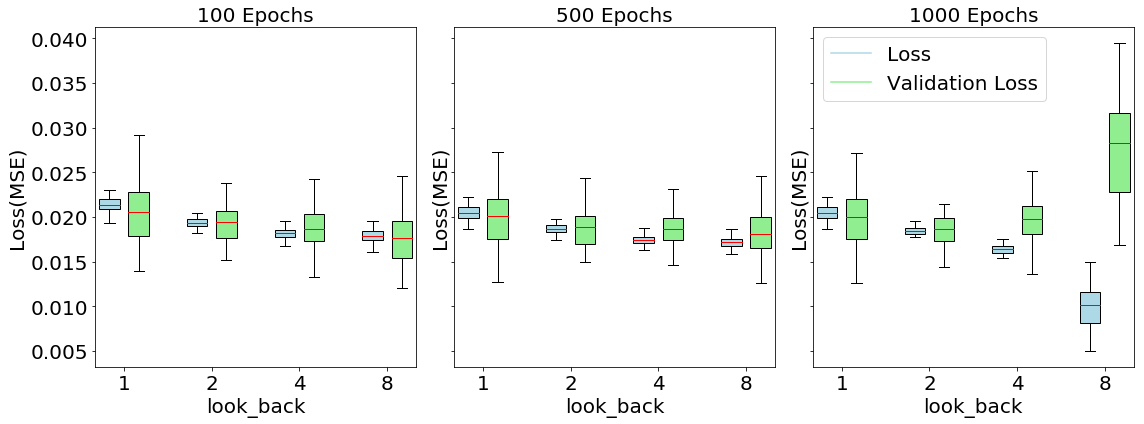

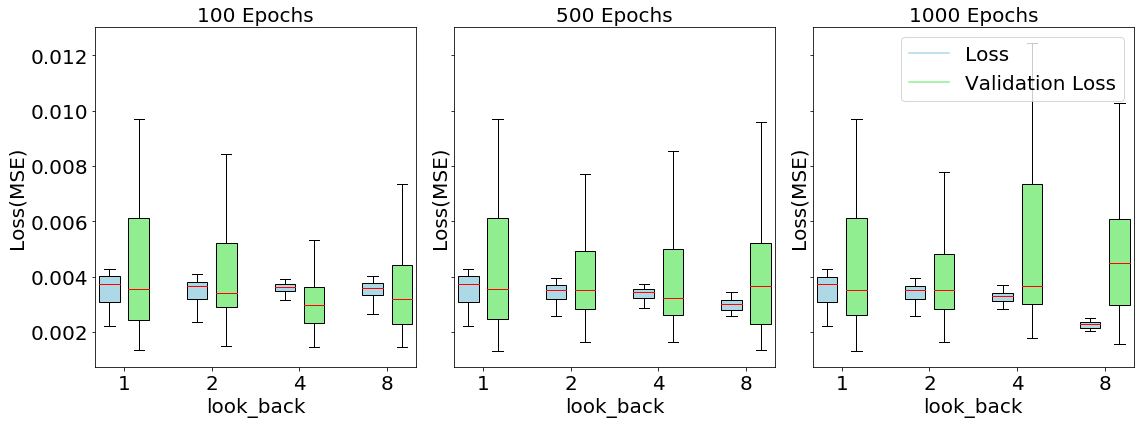

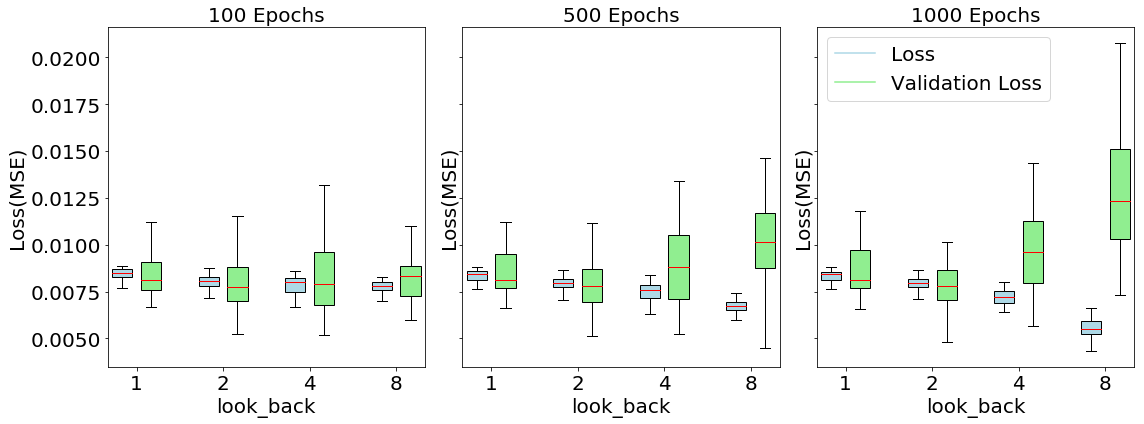

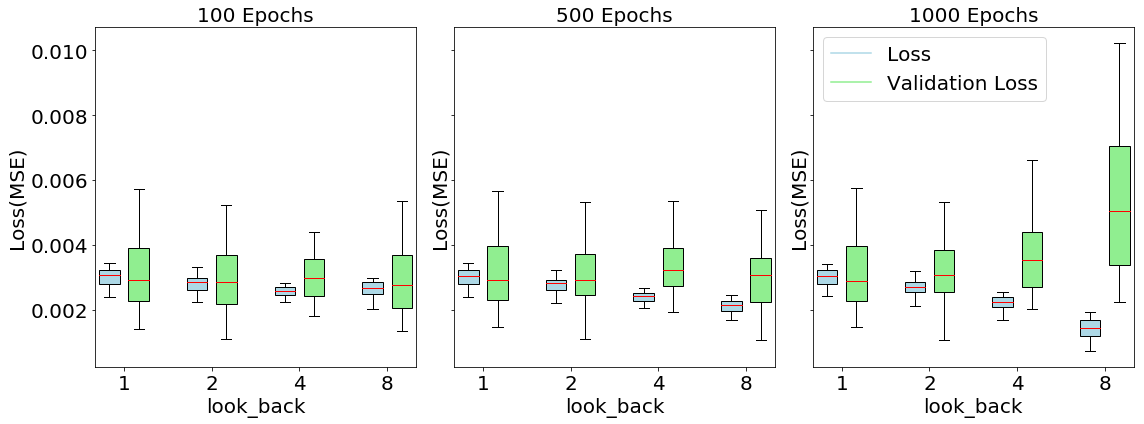

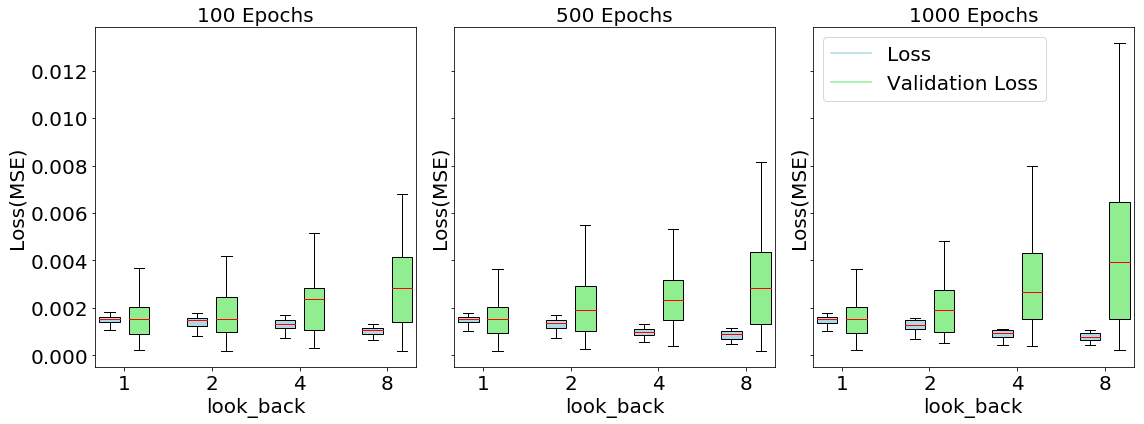

In [17]:
#plot loss vs batch_size
epochs = [100, 500, 1000]
x = 0
for source in range(1,6):
    fig, axs = plt.subplots(1,3, sharey = True)
    fig.set_size_inches(16, 6)
    #fig.suptitle('Loss and Validation Loss for pair (' + str(source) + ',11) when increasing look_back', fontsize=16, y=1.05)
    for epoch in epochs:
        d1 = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==1)].loss
        d1_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==1)].val_loss

        d2 = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==2)].loss
        d2_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==2)].val_loss

        d3 = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==4)].loss
        d3_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==4)].val_loss

        d4 = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==8)].loss
        d4_v = df[(df['source']==source)&(df['epochs']==epoch)&(df['look_back']==8)].val_loss

        axs[x].set_xlabel('look_back',fontsize=label_size)
        axs[x].set_ylabel('Loss(MSE)',fontsize=label_size)
                
        bp = axs[x].boxplot([d1,d1_v,d2,d2_v,d3,d3_v,d4,d4_v], positions=[1,2,4,5,7,8,10,11], widths = 0.7, showfliers=False, patch_artist=True)
        odd = True
        for patch in bp['boxes']:
            if(odd):
                patch.set_facecolor('lightblue')
                odd = False
            else:
                patch.set_facecolor('lightgreen')
                odd = True
        for line in bp['medians']:
            line.set_color('red')
                
        axs[x].set_xticklabels([1, 2, 4, 8])
        axs[x].set_xticks([1.5, 4.5, 7.5, 10.5])
        axs[x].set_title(str(epoch) + ' Epochs', fontsize=label_size)
        
        lim = axs[x].get_ylim()
        lim = (lim[0],lim[1]+(lim[1]*0.06))
        #axs[x].set_ylim(lim)
        axs[x].plot([], c='lightblue', label='Loss')
        axs[x].plot([], c='lightgreen', label='Validation Loss')
        plt.legend(fontsize=label_size)
        
        #i_x = numpy.random.normal(1, 0.04, size=len(d1))
        #axs[x].plot(i_x, d1, 'r.', alpha=0.2)
        axs[x].tick_params(labelsize=label_size)
        if(x==0):
            x = 1
        elif(x==1):
            x = 2
        else:
            x = 0

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_2_1_{0}.svg'.format(source))
    fig.savefig('..\..\Documents\Thesis\Pictures\Results\experiment_2_1_{0}.pdf'.format(source))
plt.show()